In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import joblib

url = '/content/indoor_data.csv'  #Azure path
data = pd.read_csv(url)


In [18]:
data.head(20)

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,latitude,longitude,elevation,status
0,2024-04-06 12:00:27+05:30,1256,163,42.0,33.8,49.0,520.0,18.0,21.0,NaN,NaN,NaN,NaN
1,2024-04-06 12:01:30+05:30,1257,162,37.0,33.8,49.0,637.0,36.0,9.0,NaN,NaN,NaN,NaN
2,2024-04-06 12:02:32+05:30,1258,173,47.0,33.7,50.0,679.0,42.0,3.0,NaN,NaN,NaN,NaN
3,2024-04-06 12:03:34+05:30,1259,168,37.0,33.3,51.0,539.0,21.0,0.0,NaN,NaN,NaN,NaN
4,2024-04-06 12:04:36+05:30,1260,168,37.0,33.3,52.0,697.0,45.0,0.0,NaN,NaN,NaN,NaN
5,2024-04-06 12:05:37+05:30,1261,170,40.0,33.3,52.0,717.0,48.0,20.0,NaN,NaN,NaN,NaN
6,2024-04-06 12:06:39+05:30,1262,171,40.0,33.3,53.0,730.0,50.0,4.0,NaN,NaN,NaN,NaN
7,2024-04-06 12:07:40+05:30,1263,171,42.0,33.3,53.0,570.0,25.0,6.0,NaN,NaN,NaN,NaN
8,2024-04-06 12:08:42+05:30,1264,167,38.0,33.3,53.0,692.0,44.0,3.0,NaN,NaN,NaN,NaN
9,2024-04-06 12:09:44+05:30,1265,172,40.0,33.3,53.0,699.0,45.0,0.0,NaN,NaN,NaN,NaN


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  1333 non-null   object 
 1   entry_id    1333 non-null   int64  
 2   field1      1333 non-null   int64  
 3   field2      1333 non-null   float64
 4   field3      1333 non-null   float64
 5   field4      1333 non-null   float64
 6   field5      1333 non-null   float64
 7   field6      1333 non-null   float64
 8   field7      1333 non-null   float64
 9   latitude    0 non-null      float64
 10  longitude   0 non-null      float64
 11  elevation   0 non-null      float64
 12  status      0 non-null      float64
dtypes: float64(10), int64(2), object(1)
memory usage: 135.5+ KB


In [20]:
data.drop(columns=['entry_id','latitude','longitude','elevation','status'], inplace= True)

In [22]:
data.rename(columns={
    'field1': 'MQ7 Value',
    'field2': 'MQ135 Value',
    'field3': 'Temperature',
    'field4': 'Humidity',
    'field5': 'eCO2',
    'field6': 'TVOC',
    'field7': 'Dust Density'
}, inplace=True)


In [23]:
data.head(5)

,created_at,MQ7 Value,MQ135 Value,Temperature,Humidity,eCO2,TVOC,Dust Density
0,2024-04-06 12:00:27+05:30,163,42.0,33.8,49.0,520.0,18.0,21.0
1,2024-04-06 12:01:30+05:30,162,37.0,33.8,49.0,637.0,36.0,9.0
2,2024-04-06 12:02:32+05:30,173,47.0,33.7,50.0,679.0,42.0,3.0
3,2024-04-06 12:03:34+05:30,168,37.0,33.3,51.0,539.0,21.0,0.0
4,2024-04-06 12:04:36+05:30,168,37.0,33.3,52.0,697.0,45.0,0.0


In [24]:
# Scale the values
scaler = StandardScaler()
data[['MQ7 Value', 'MQ135 Value', 'Temperature', 'Humidity', 'eCO2', 'TVOC', 'Dust Density']] = scaler.fit_transform(
    data[['MQ7 Value', 'MQ135 Value', 'Temperature', 'Humidity', 'eCO2', 'TVOC', 'Dust Density']]
)

In [25]:
data.head(5)

,created_at,MQ7 Value,MQ135 Value,Temperature,Humidity,eCO2,TVOC,Dust Density
0,2024-04-06 12:00:27+05:30,-1.517812,0.676778,1.010989,-0.668653,-0.883888,-0.870146,0.086268
1,2024-04-06 12:01:30+05:30,-1.584610,-1.122475,1.010989,-0.668653,-0.089081,-0.072382,-0.080050
2,2024-04-06 12:02:32+05:30,-0.849832,2.476031,0.909126,-0.563879,0.196234,0.193539,-0.163209
3,2024-04-06 12:03:34+05:30,-1.183822,-1.122475,0.501674,-0.459105,-0.754817,-0.737185,-0.204788
4,2024-04-06 12:04:36+05:30,-1.183822,-1.122475,0.501674,-0.354330,0.318512,0.326500,-0.204788


In [26]:
# Train ARIMA model for MQ135 Value
# Set the index to the datetime column
data['datetime'] = pd.to_datetime(data['created_at'])
data.set_index('datetime', inplace=True)

In [28]:
data.drop(columns=['created_at'], inplace= True)

In [29]:
# Fit ARIMA model
model = sm.tsa.ARIMA(data['MQ135 Value'], order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
# In-sample predictions: choose a starting index that accounts for the ARIMA model order
start_index = 10  # or choose an appropriate start index based on your data
data['predictions'] = model_fit.predict(end=len(data)-1, typ='levels')

In [38]:
# Anomaly detection using Z-scores
data['z_score'] = np.abs(stats.zscore(data['MQ135 Value']))
threshold = 3  # Define threshold for anomalies
data['anomaly'] = data['z_score'] > threshold

In [39]:
data.head(5)

,MQ7 Value,MQ135 Value,Temperature,Humidity,eCO2,TVOC,Dust Density,predictions,z_score,anomaly
datetime,,,,,,,,,,
2024-04-06 12:00:27+05:30,-1.517812,0.676778,1.010989,-0.668653,-0.883888,-0.870146,0.086268,0.000000,0.676778,False
2024-04-06 12:01:30+05:30,-1.584610,-1.122475,1.010989,-0.668653,-0.089081,-0.072382,-0.080050,0.676778,1.122475,False
2024-04-06 12:02:32+05:30,-0.849832,2.476031,0.909126,-0.563879,0.196234,0.193539,-0.163209,-0.208008,2.476031,False
2024-04-06 12:03:34+05:30,-1.183822,-1.122475,0.501674,-0.459105,-0.754817,-0.737185,-0.204788,0.635921,1.122475,False
2024-04-06 12:04:36+05:30,-1.183822,-1.122475,0.501674,-0.354330,0.318512,0.326500,-0.204788,0.193071,1.122475,False


In [40]:
# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(data['MQ135 Value'], data['predictions'].dropna()))
print(f'RMSE: {rmse}')

RMSE: 1.0211438730481361


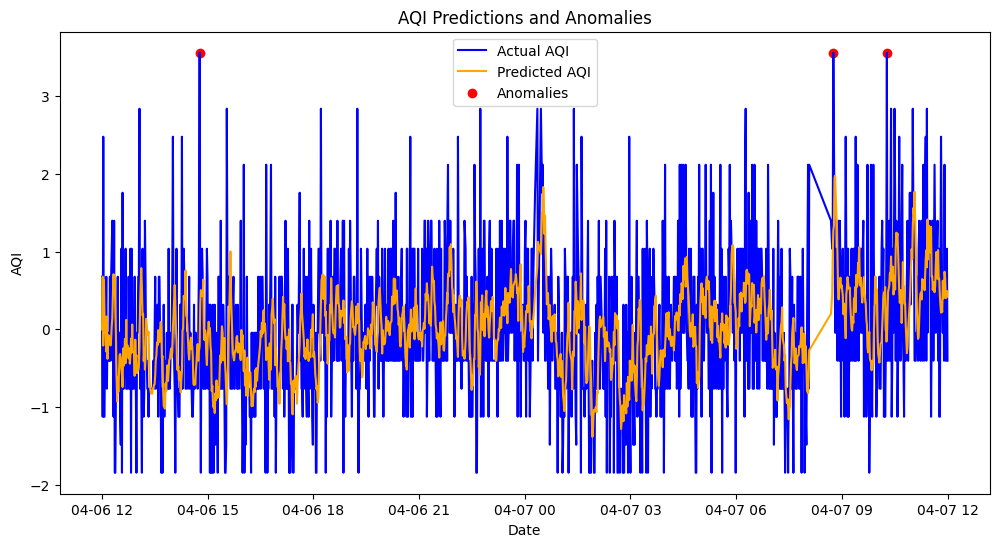

In [41]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(data['MQ135 Value'], label='Actual AQI', color='blue')
plt.plot(data['predictions'], label='Predicted AQI', color='orange')
plt.scatter(data[data['anomaly']].index, data[data['anomaly']]['MQ135 Value'], color='red', label='Anomalies')
plt.title('AQI Predictions and Anomalies')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

In [42]:
# Save the model
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

In [ ]:
# Load the model for real-time predictions
loaded_model = joblib.load('arima_model.pkl')

# Example of making a prediction with new data
# new_data = pd.DataFrame({'MQ7 Value': [...], 'Temperature': [...], ...})  # New input data
# new_data_scaled = scaler.transform(new_data)
# new_prediction = loaded_model.predict(end=len(data) + len(new_data) - 1, typ='levels')